**Задание 1**

1) Используя средства модуля [pandas](https://github.com/dm-fedorov/python3_intro/blob/master/lesson_13/pandas.ipynb), определите среднюю, максималную, минимальную зарплату и среднюю, максималную, минимальную пенсию в Санкт-Петербурге в 2018 году.

2) Продемонстрируйте умение построения графиков (для произвольных значений) с помощью plot.


**Задание 2**

Для [файла](http://dfedorov.spb.ru/python3/forecast.html), расположенного в сети Интернет, напишите сценарий с использованием [модуля bs4](https://github.com/dm-fedorov/python3_intro/blob/master/lesson_13/bs4.ipynb), который извлекает данные и сохраняет их в файле формата CSV, где первый столбец - день недели, второй столбец - погода. 

**Переходим к решению первой задачи:**

Импортируем модуль pandas:

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Читаем содержимое csv файла:

In [4]:
data = pd.read_csv('opendata.csv', encoding='cp1251')
data.head()

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235


In [139]:
a=data[data["name"]=="Средняя зарплата"][data["region"]=="Санкт-Петербург"][data["date"].str.contains("2018")]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [149]:
a["value"].mean()

43176.454545454544

In [147]:
a["value"].min()

31599

In [150]:
a["value"].max()

49700

In [151]:
b=data[data["name"]=="Средняя пенсия"][data["region"]=="Санкт-Петербург"][data["date"].str.contains("2018")]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [153]:
b["value"].mean()

17023.454545454544

In [159]:
b["value"].max()

19922

In [154]:
b["value"].min()

14694

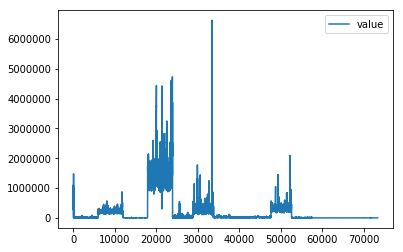

In [165]:
data.plot()

**Переходим к решению второй задачи:**

In [1]:
import bs4


In [2]:
def read_url(url):
    """ Читает содержимое сайта """
    import urllib.request    
    with urllib.request.urlopen(url) as webpage:
        text = webpage.read().decode('utf-8')
    return text

In [4]:
text = read_url("http://dfedorov.spb.ru/python3/forecast.html")
print(text)

<html>
  <body>
    <div class="row row-forecast">
        <div class="forecast-label"><b>Сегодня ночью</b></div>
        <div class="forecast-text">Небольшая вероятность ливней и гроз до 22:00. Облачно с прояснениями около 66. Ветер юго-западный около 9 миль в час. Вероятность осадков 20%. Возможны новые осадки от десятой до четверти дюйма.</div>
    </div>
    <div class="row row-forecast">
        <div class="forecast-label"><b>Пятница</b></div>
        <div class="forecast-text">Местами солнечно. Высоко около 77, с температурами, падающими приблизительно к 75 днем. Северо-западный ветер от 7 до 12 миль в час, с порывами до 18 миль в час.</div>
    </div>
    <div class="row row-forecast">
        <div class="forecast-label"><b>Ночь пятницы</b></div>
        <div class="forecast-text">Облачно с прояснениями около 63. Северный ветер от 7 до 10 миль в час.</div>
    </div>
    <div class="row row-forecast">
        <div class="forecast-label"><b>Суббота</b></div>
        <div class="f

In [5]:
bs = bs4.BeautifulSoup(text, 'html.parser')

In [37]:
grid = []
special_list = bs.select('.forecast-label')
special_list1 = bs.select('.forecast-text')
for i in range(len(special_list)):
  grid.append([special_list[i].text,special_list1[i].text])  


In [38]:
grid 


[['Сегодня ночью',
  'Небольшая вероятность ливней и гроз до 22:00. Облачно с прояснениями около 66. Ветер юго-западный около 9 миль в час. Вероятность осадков 20%. Возможны новые осадки от десятой до четверти дюйма.'],
 ['Пятница',
  'Местами солнечно. Высоко около 77, с температурами, падающими приблизительно к 75 днем. Северо-западный ветер от 7 до 12 миль в час, с порывами до 18 миль в час.'],
 ['Ночь пятницы',
  'Облачно с прояснениями около 63. Северный ветер от 7 до 10 миль в час.'],
 ['Суббота',
  'В основном солнечно, с высокой температурой около 73. Северный ветер около 10 миль в час.'],
 ['Субботняя ночь',
  'Облачно с прояснениями, около 63. Ветер северный, 5-10 миль в час.'],
 ['Воскресенье', 'В основном солнечно, с высотой около 73.'],
 ['Воскресный вечер', 'Облачно с прояснениями около 64.'],
 ['Понедельник', 'Преимущественно солнечно, с высоким около 74.'],
 ['Ночь понедельника', 'В основном ясно, с низким около 65.'],
 ['Вторник', 'Солнечный, с высоким около 75.'],
 ['

In [39]:
df = pd.DataFrame(grid,columns = ["day","weather"])
print(df)

                  day                                            weather
0       Сегодня ночью  Небольшая вероятность ливней и гроз до 22:00. ...
1             Пятница  Местами солнечно. Высоко около 77, с температу...
2        Ночь пятницы  Облачно с прояснениями около 63. Северный вете...
3             Суббота  В основном солнечно, с высокой температурой ок...
4      Субботняя ночь  Облачно с прояснениями, около 63. Ветер северн...
5         Воскресенье           В основном солнечно, с высотой около 73.
6    Воскресный вечер                   Облачно с прояснениями около 64.
7         Понедельник      Преимущественно солнечно, с высоким около 74.
8   Ночь понедельника                В основном ясно, с низким около 65.
9             Вторник                     Солнечный, с высоким около 75.
10     Вечер вторника                В основном ясно, с низким около 65.
11              Среда                     Солнечный, с высоким около 77.
12         Ночь среды                В основном ясн

In [44]:
dt =df.to_csv(index=False)
print(dt)

day,weather
Сегодня ночью,Небольшая вероятность ливней и гроз до 22:00. Облачно с прояснениями около 66. Ветер юго-западный около 9 миль в час. Вероятность осадков 20%. Возможны новые осадки от десятой до четверти дюйма.
Пятница,"Местами солнечно. Высоко около 77, с температурами, падающими приблизительно к 75 днем. Северо-западный ветер от 7 до 12 миль в час, с порывами до 18 миль в час."
Ночь пятницы,Облачно с прояснениями около 63. Северный ветер от 7 до 10 миль в час.
Суббота,"В основном солнечно, с высокой температурой около 73. Северный ветер около 10 миль в час."
Субботняя ночь,"Облачно с прояснениями, около 63. Ветер северный, 5-10 миль в час."
Воскресенье,"В основном солнечно, с высотой около 73."
Воскресный вечер,Облачно с прояснениями около 64.
Понедельник,"Преимущественно солнечно, с высоким около 74."
Ночь понедельника,"В основном ясно, с низким около 65."
Вторник,"Солнечный, с высоким около 75."
Вечер вторника,"В основном ясно, с низким около 65."
Среда,"Солнечный, с высо